# Statistical Methods (SS18) {-}
## David Bubeck, Henrik Lukas Ruh & Manuel Bayer {-}
## Exercise 8 for August 16, 2018, 9:00 {-}

### 8.1 Return to the lighthouse {-}
We extend the lighthouse problem now by considering the position along the beach x0 as unknown, becoming a to-be-estimated parameter. To estimate the (x0; y0) vector you should set-up its joint posterior PDF. From that derive the MAP, the mean, the standard deviation of x0, and y0, and their correlation. To this end, construct a reasonably fine grid in x and y and calculate the posterior on that 2D grid. You should try two priors: (i) a flat prior p(x; y) / 1; (ii) a prior p(x; y) / 1 y(1+x2) This means, assume a Cauchy distribution for x centered at the origin, and an uninformative prior for y. 

##### a: Plot the normalized posterior for both priors.
##### b: Can you explain the differences or similarities between the two cases?
##### c: Do you have an idea how to determine the joint confidence region for (x0; y0)?
##### d: Optional: sample the posterior with a Markov chain to calculate the means etc

In [15]:
library(rmutil) # Package for two dimensional integration

# read in data
data <- read.table("lighthouse.dat", header=FALSE)

# display some of the data
head(data)

xk <- data$V1

V1
-57.20
-18.53
-10.66
-4.79
-4.16
-2.59


In [128]:
samp <- 100 # Sampling of 2D grid
x0range <- seq(0,2.5, length=samp)
y0range <- seq(0.01,5, length=samp)

L <- function(x0, y0) prod(1/(2 * pi) * y0 / (x0 ** 2 - 2*x0 * xk + y0 ** 2 + xk ** 2)) # Likelihood
uninfo_prior <- 1 # Not normalised uninformative prior
cauchy_prior <- function(x, y) 1/(y * (1 + x ** 2)) # Not normalised Cauchy prior

uninfo_posterior <- function(x0, y0)  L(x0, y0)*uninfo_prior # Not normalised posterior for the uninformative prior
cauchy_posterior <- function(x0, y0) L(x0, y0)*cauchy_prior(x0, y0) # Not normalised posterior wrt Cauchy prior

uninfo_posterior_v <- function(v)  L(v[1], v[2])*uninfo_prior # Not normalised posterior for the uninformative prior
cauchy_posterior_v <- function(v) L(v[1], v[2])*cauchy_prior(v[1], v[2]) # Not normalised posterior wrt Cauchy prior

uninfo_posterior_val <- matrix(ncol=samp, nrow=samp) # Initialisation of the matrix containing the not normalised posterior values for the uninformative prior
cauchy_posterior_val <- matrix(ncol=samp, nrow=samp) # Initialisation of the matrix containing the not normalised posterior values for the Cauchy prior

# vector with all possible coordinates
coords <- expand.grid(x0range, y0range)
uninfo_posterior_val <- matrix(apply(coords,1,uninfo_posterior_v),ncol=samp, nrow=samp)
cauchy_posterior_val <- matrix(apply(coords,1,cauchy_posterior_v),ncol=samp, nrow=samp)

# normalization
uninfo_integral <-  int2(uninfo_posterior, a=c(-Inf,-Inf), b=c(Inf,Inf)) # Normalised posterior regarding uninformative posterior
cauchy_integral <-  int2(cauchy_posterior,  a=c(0.01,0.01), b=c(100,100)) # Normalised posterior for Cauchy prior

uninfo_norm_posterior <- uninfo_posterior_val/uninfo_integral
cauchy_norm_posterior <- cauchy_posterior_val/cauchy_integral

In [129]:
# statistics
# step size for numerical integration
dx <- (max(x0range)-min(x0range))/length(x0range)
dy <- (max(y0range)-min(y0range))/length(y0range)

##### Uninformative prior #####
uninfo_map <- c(x0range[which.max(uninfo_norm_posterior) %/% samp], 
                y0range[which.max(uninfo_norm_posterior)%/% samp]) # MAP
uninfo_mean <- c(sum(colSums(uninfo_norm_posterior)*x0range)*dx*dy, 
                 sum(rowSums(uninfo_norm_posterior)*y0range)*dx*dy) # Mean  
uninfo_median <- c(x0range[which.min((cumsum(colSums(uninfo_norm_posterior))
                                      /samp ** 2*(max(x0range)-min(x0range))-.5)**2)], 
                   y0range[which.min((cumsum(rowSums(uninfo_norm_posterior))
                                      /samp ** 2*(max(y0range)-min(y0range))-.5)**2)]) # Median
uninfo_sig <- c((sum(colSums(uninfo_norm_posterior * x0range ** 2)) * (max(x0range)-min(x0range))/length(x0range) 
                 - uninfo_mean[1] ** 2)**.5, 
                (sum(rowSums(uninfo_norm_posterior * y0range ** 2)) * (max(y0range)-min(y0range))/length(y0range) 
                 - uninfo_mean[2] ** 2)**.5) # Standard deviation

cat("\nUninformative prior (x0,y0)\n---------------------\n")
cat("MAP = ", uninfo_map," miles\n")
cat("mean = ", uninfo_mean," miles\n")
cat("median = ", uninfo_median," miles\n")
cat("sigma = ", uninfo_sig," miles\n")

##### Cauchy prior #####
cauchy_map <- c(x0range[which.max(cauchy_norm_posterior) %/% samp], y0range[which.max(cauchy_norm_posterior) %/% samp]) # MAP
cauchy_mean <- c(sum(colSums(cauchy_norm_posterior)*x0range)*dx*dy, 
                 sum(rowSums(cauchy_norm_posterior)*y0range)*dx*dy) # Mean  cauchy_median <- c(x0range[which.min((cumsum(colSums(cauchy_norm_posterior))/samp ** 2*(max(x0range)-min(x0range))-.5)**2)], y0range[which.min((cumsum(rowSums(cauchy_norm_posterior))/samp ** 2*(max(y0range)-min(y0range))-.5)**2)]) # Median
cauchy_sig <- c((sum(colSums(cauchy_norm_posterior * x0range ** 2)) * (max(x0range)-min(x0range))/length(x0range) - cauchy_mean[1] ** 2)**.5, (sum(rowSums(cauchy_norm_posterior * y0range ** 2)) * (max(y0range)-min(y0range))/length(y0range) - cauchy_mean[2] ** 2)**.5) # Standard deviation

cat("\nCauchy prior (x0,y0)\n---------------------\n")
cat("MAP = ", cauchy_map," miles\n")
cat("mean = ", cauchy_mean," miles\n")
cat("median = ", cauchy_median," miles\n")
cat("sigma = ", cauchy_sig," miles\n")


Uninformative prior (x0,y0)
---------------------
MAP =  0.4292929 0.8668687  miles
mean =  0.2415621 1.228708  miles
median =  2.222222 5  miles
sigma =  3.949896 11.13559  miles

Cauchy prior (x0,y0)
---------------------
MAP =  0.4292929 0.8668687  miles
mean =  0.4684478 2.408323  miles
median =    miles
sigma =  5.467943 15.35001  miles


[1] 0.1449372

[1] 0.4900499

[1] 1.150872e-88

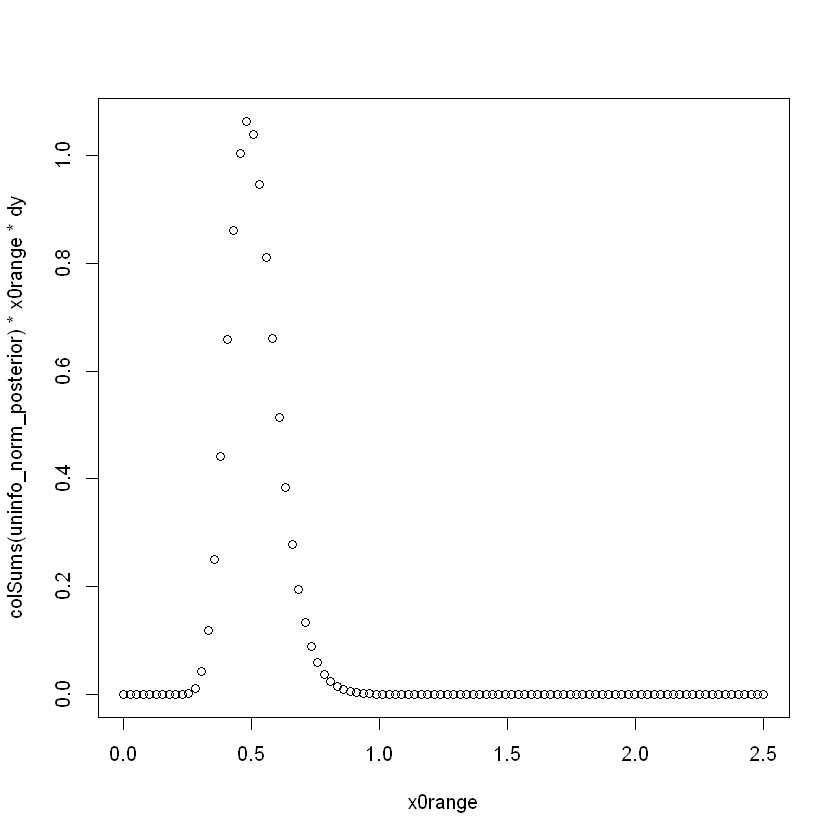

In [130]:
plot(x0range,colSums(uninfo_norm_posterior)*x0range*dy)
mean(colSums(uninfo_norm_posterior)*x0range*dy)*1.5
sum(colSums(uninfo_norm_posterior))*dx*dy
int2(uninfo_posterior, a=c(0,0), b=c(Inf,Inf))

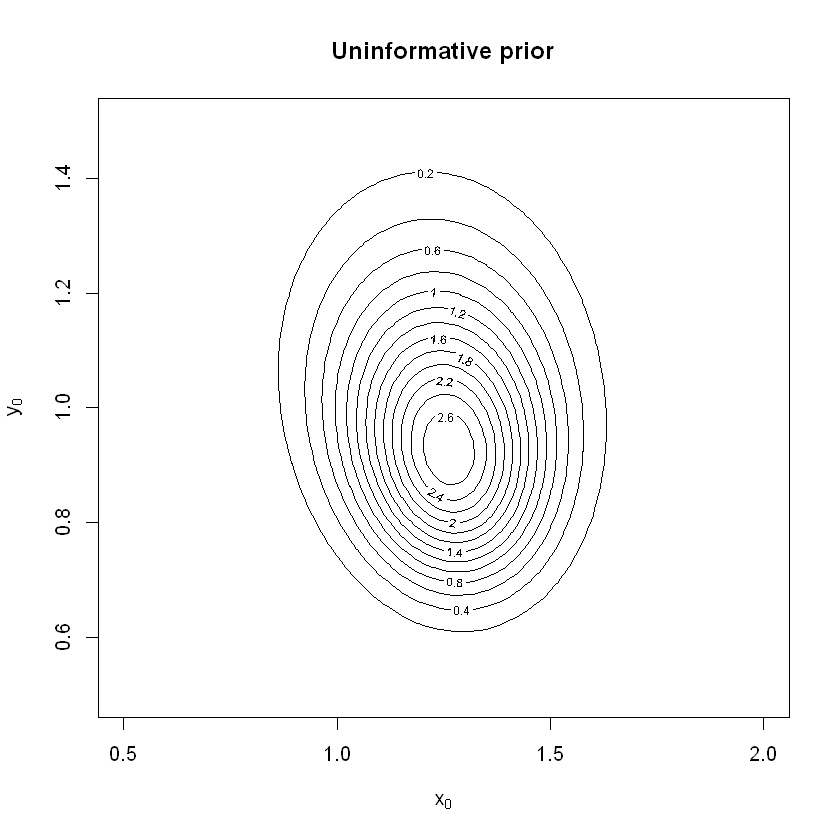

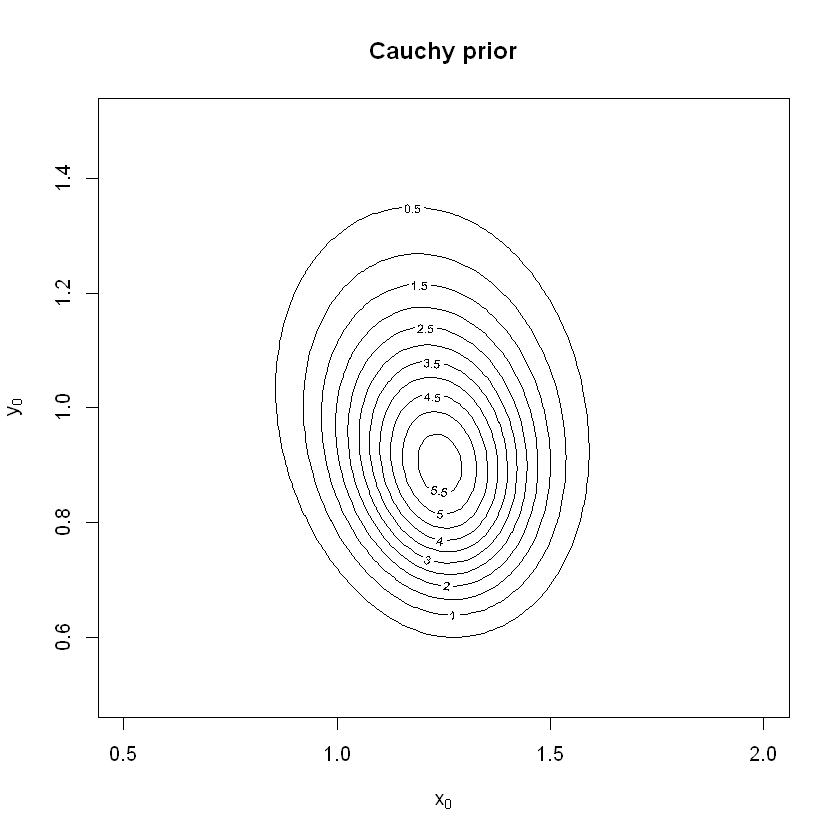

In [55]:
##### a #####

# plotting
contour(x0range, y0range, uninfo_norm_posterior, xlab=expression('x'[0]), ylab=expression('y'[0]), main="Uninformative prior") # Contour plot of posterior using uninformative prior
#persp(x0range, y0range, uninfo_norm_posterior, xlab=expression('x'[0]), ylab=expression('y'[0]), zlab="posterior", main="Uninformative prior") # 3D surface plot of posterior for uninformative prior
contour(x0range, y0range, cauchy_norm_posterior, xlab=expression('x'[0]), ylab=expression('y'[0]), main="Cauchy prior") # Contour plot of posterior using Cauchy prior
#persp(x0range, y0range, uninfo_norm_posterior, xlab=expression('x'[0]), ylab=expression('y'[0]), zlab="posterior", main="Cauchy prior") # 3D surface plot of posterior for Cauchy prior

### 8.2 Interpretation of the p-value {-}
In a special issue of the \Spektrum der Wissenschaft" Magazine entitled Vorsicht Statistik! your lecturer came across an article on the interpretation (or often mis-interpretation) of the p-value in hypothesis testing. The article contained the following information box:

---

The question now is: do the numbers given in the figure of the box make sense? Can you confirm the numbers?

##### a: Apparently, the box is about hypothesis testing. While it is not clearly stated, the given p- values can be interpreted as significance level of the test (the experiment) that is conducted to decide whether a substance is effective or not. Assuming this, what is exactly meant by "Wahrscheinlichkeit nach dem Experiment" (probability after the experiment)?


#### A:
The 'Wahrscheinlichkeit nach dem Eperiment'  $p_{nE}$, hereafter denoted with WnE, describes the probability that a hypothesis is true given that the substance was tested to be effective ($+$). The two possible hypothesis are (i) the nul hypothesis $\mathrm{H}_0$, meaning the substance is in fact not effective, and (ii) the hypothesis that the substance is effective $\mathrm{\bar H}_0$. Hence,
$$
p_{nE}(\mathrm{H}_0) = p(\mathrm{H}_0|+),
$$
$$
p_{nE}(\mathrm{\bar H}_0) = p(\mathrm{\bar H}_0|+).
$$

##### b: No statement is made about the power of the test. However, this is an important piece of information. Can you "reverse engineer" the power of the test(s)? Is it always the same? 


#### A:
The power of the test $\beta$ denotes the probability that the test is positive, the substance is measured to be effective, under the condition that the hypothesis $\mathrm{\bar H}_0$ is fulfilled, the substance is indeed effective, and is given by
$$
\beta = p(+|\mathrm{\bar H}_0).
$$

The given piece of information is the significance level $\alpha$, where
$$
\alpha = p(+|\mathrm{\bar H}_0).
$$

Now, we can compute $\beta$, where we use the Bayes theorem.
$$
\frac{\alpha}{\beta} = \frac{p(+|\mathrm{H}_0)}{p(+|\mathrm{\bar H}_0)}
= \frac{p(\mathrm{H}_0|+)p(\mathrm{\bar H}_0)p(+)}{p(\mathrm{\bar H}_0|+)p(\mathrm{ H}_0)p(+)}
= \frac{p(\mathrm{H}_0|+)p(\mathrm{\bar  H}_0)}{p(\mathrm{\bar H}_0|+)p(\mathrm{H}_0)}.
$$

Herein, $ p(\mathrm{H}_0)$ and $p(\mathrm{\bar H}_0)$ are the 'a priori' probabilties of the hypothesis. Thus,
$$
\beta = \alpha \ \frac{p_{nE}(\mathrm{\bar H}_0)p(\mathrm{ H}_0)}{p_{nE}(\mathrm{ H}_0)p(\mathrm{\bar  H}_0)}.
$$

The $\beta$ values for the data in the box are given in the table below.

|         | $\alpha = 0.05$       | $\alpha = 0.01$        |
|---------------------|---------------------|---------------------|
| case 1 | $\beta = 0.12$    | $\beta = 0.08$    |   
| case 2 | $\beta = 0.12$    | $\beta = 0.08$    | 
| case 3 | $\beta = 0.13$    | $\beta = 0.11$    | 

case 1: 'abwegige Idee',
case 2: 'Münzwurf',
case 3: 'fast sichere Sache'

##### c: What is your opinion about the given example?

#### A:
The power of the test is quite low, meaning that if we had a larger $\beta$ the WnE for the substance to be effective would be larger as well. However, the example shows that one has to be careful what kind of probability is stated. in especially, the p-value is not the complement of the probability that a hypothesis is true.